# Stochastic Simulation

*Winter Semester 2023/24*

17.11.2023

Prof. Sebastian Krumscheid<br>
Asstistant: Stjepan Salatovic

<h3 align="center">
Exercise sheet 03
</h3>

---

<h1 align="center">
Multivariate random variable generation and Gaussian random processes
</h1>

In [1]:
import matplotlib.pylab as plt
import numpy as np

from ipywidgets import interact
from scipy.stats import uniform, norm
from scipy.integrate import quad

In [2]:
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

## Exercise 1

Consider a multivariate Gaussian random variable $\boldsymbol{X} = (X_1,X_2,\dots,X_n)^T\sim\mathcal{N} (\boldsymbol{\mu},\Sigma)$, with mean $\boldsymbol{\mu}\in\mathbb{R}^n$ and covariance matrix $\Sigma\in\mathbb{R}^{n\times n}$.

1. Generate a sample of $N=10^6$ independent random vectors $\boldsymbol{X}_i$, $1\le i\le N$, each $\boldsymbol{X}_i$ following a $\mathcal{N}(\boldsymbol{\mu},\Sigma)$ distribution with

    \begin{equation*}
    \boldsymbol{\mu} = \begin{pmatrix}2\\1 \end{pmatrix}
    \quad\text{and}\quad
    \Sigma = \begin{pmatrix} 1 & 2\\2 & 5\end{pmatrix}\;.
    \end{equation*}

    Specifically, use the Cholesky decomposition `numpy.linalg.cholesky` to compute the factor $A$, such that $\Sigma = A A^t$. Generate the standard normal vectors $\boldsymbol{Y}_i \sim \mathcal{N}(0, I_{2 \times 2}), 1 \leq i \leq N$ using `numpy.random.randn`. Then generate the $\boldsymbol{X}_i$ as $\boldsymbol{X}_i  = \boldsymbol{\mu} + A \boldsymbol{Y}_i$. Assess the quality of the samples by  plotting a bivariate histogram using `plt.hist2d`.

The difference between part 1 and part 2 of this exercise is that the
covariance matrix $\Sigma$ in part 1 is regular, while it is singular
in part 2. Consequently, a Cholesky decomposition via `numpy.linalg.cholesky` is
not possible in part 2 and an eigenvalue decomposition (e.g. via `numpy.linalg.svd`) has to be used.

In [3]:
N = 10 ** 6

mu = np.array([2, 1])
sigma = np.array([
    [1,2],
    [2,5],
])

In [4]:
A = np.linalg.cholesky(sigma)

In [5]:
y = np.random.randn(2, N)
x = mu + np.dot(A, y).T

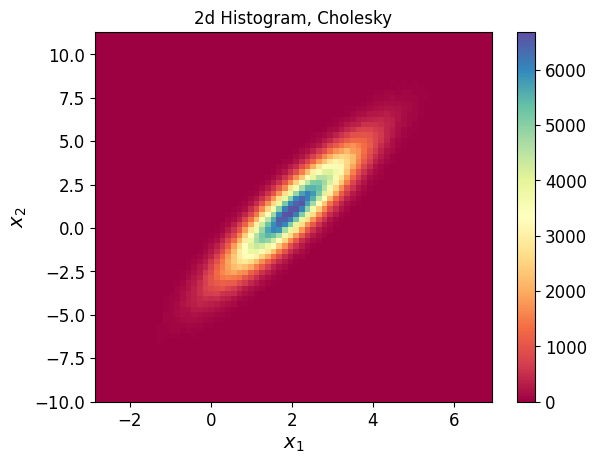

In [6]:
plt.hist2d(*x.T, bins=70,cmap='Spectral')
plt.colorbar()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('2d Histogram, Cholesky');

2. Propose a method for generating Gaussian random variables $\boldsymbol{X}\sim\mathcal{N}(\boldsymbol{\mu},\Sigma)$ with covariance matrix $\Sigma = \bigl(\begin{smallmatrix} 1 & 2\\2 & 4\end{smallmatrix} \bigr)$ and mean $\boldsymbol{\mu}$ as before. Test your method by generating $N=10^6$ independent copies of the random vector and plot a bivariate histogram. Compare the outcomes with the previous point and explain the differences.

In [7]:
sigma = np.array([
    [1,2],
    [2,4],
])

In [8]:
U, s, Vh = np.linalg.svd(sigma)
A = U * np.sqrt(s)

In [9]:
y = np.random.randn(2, N)
x = mu + np.dot(A, y).T

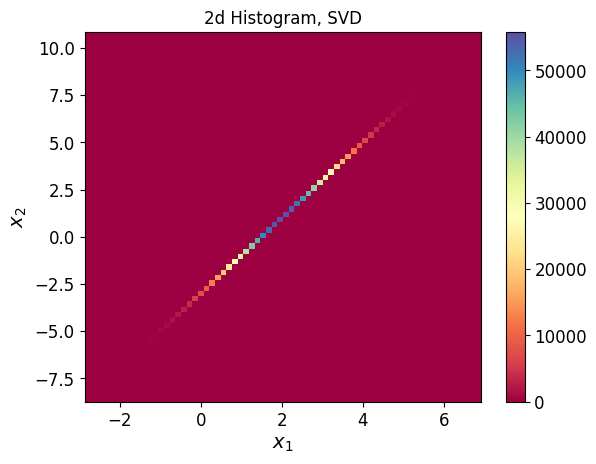

In [10]:
plt.hist2d(*x.T, bins=70,cmap='Spectral')
plt.colorbar()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('2d Histogram, SVD');

## Exercise 2

Consider a Gaussian process $\{X_t\;,\;t\in I\}$ on $I=[0,1]$ with
mean function $\mu_X\colon I\to \mathbb{R}$,

\begin{equation*}
\large
  \mu_X(t) \equiv \mathbb{E}[X_t] = \sin(2\pi t)\;,
\end{equation*}

and covariance function $C_X\colon I\times I\to  \mathbb{R}$,

\begin{equation*}
\large
  C_X(t,s) \equiv \mathbb{E}[(X_t-\mu_X(t))(X_s-\mu_X(s))] = e^{-\lvert t-s\rvert/\rho}\;,
\end{equation*}

where $\rho>0$.

1. Generate the Gaussian process in a set of $n$ points $t_1,\dots,t_n\in I$. Plot the resulting point values of the random process for various values of $n$ and $\rho$.

In [11]:
def mu(t):
    """Mean function."""
    return np.sin(2 * np.pi * t)

def cov(t, s, rho):
    """Covariance function."""
    return np.exp(-np.abs(t - s) / rho)

In [12]:
def gaussian_process(n: int, rho: float) -> np.array:
    """
    Generates a Gaussian process in `n` points.
    """
    t = np.linspace(0, 1, n)
    mu_ = mu(t)
    
    T, T_ = np.meshgrid(t, t)
    sigma = cov(T, T_, rho=rho)
    
    U, D, V = np.linalg.svd(sigma)
    A = U * np.sqrt(D)
    x = mu_ + A @ np.random.randn(n)
    
    return x

In [13]:
def plot_gp(n: int, rho: float):
    """Interaction helper."""
    gp = gaussian_process(n, rho)
    plt.plot(np.linspace(0, 1, n), gp)
    plt.xlabel(r"$t$")
    plt.ylabel(r"$X_t$")
    plt.title("Gaussian process")

interact(plot_gp, n=(50, 500), rho=[0.1, 0.05, 0.005]);

interactive(children=(IntSlider(value=275, description='n', max=500, min=50), Dropdown(description='rho', opti…

2. Generate the Gaussian process for $\rho=1/200$ on a uniform partition of $I=[0,1]$ with $n=51$ points, i.e. $t_{i}=\frac{i-1}{n-1}$ for $i=1\dots,n$.  Let's denote this collection of point-wise evaluations of $\{X_t,\,t\in I\}$ by $\boldsymbol{Z}_n$.  Then generate $m=n-1=50$ additional point evaluations of the Gaussian process in new points $t_{n+1},\dots, t_{n+m}$ by a uniform grid refinement (i.e.$t_{n+j}=\frac{2j-1}{2(n-1)}$ for $j=1,\dots,m=n-1$), denoted by $\boldsymbol{Y}_m$, conditioned upon the previously generated ones $\boldsymbol{Z}_n$. Specifically, use the results for conditioned multivariate Gaussian random variables discussed in the lecture notes.

In [14]:
def conditional_gaussian_process(n: int, rho: float) -> np.array:
    """
    Refines a Gaussian process by generating new points conditioned on a previous process.
    """
    z = gaussian_process(n, rho)

    t_all = np.linspace(0, 1, 2 * n)
    mu_all = mu(t_all)
    
    T, T_ = np.meshgrid(t_all, t_all)
    sigma_all = cov(T, T_, rho=rho)

    y_idx = np.arange(0, 2 * n, 2)
    z_idx = np.arange(1, 2 * n, 2)

    mu_y = mu_all[y_idx]
    mu_z = mu_all[z_idx]

    sigma_yy = sigma_all[np.ix_(y_idx, y_idx)]
    sigma_zz = sigma_all[np.ix_(z_idx, z_idx)]
    sigma_yz = sigma_all[np.ix_(y_idx, z_idx)]
    sigma_zy = sigma_all[np.ix_(z_idx, y_idx)]

    mu_ygz = mu_y + sigma_yz @ (np.linalg.solve(sigma_zz, z - mu_z))
    sigma_ygz = sigma_yy - sigma_yz @ (np.linalg.solve(sigma_zz, sigma_zy))

    U, D, V = np.linalg.svd(sigma_ygz)
    A = U * np.sqrt(D)
    ygz = mu_ygz + A @ np.random.randn(n)
    
    gp_all = np.zeros(2 * n)
    gp_all[z_idx] = z
    gp_all[y_idx] = ygz
    
    return z, ygz, gp_all

In [15]:
def plot_cond_gp(n: int, rho: float):
    """Interaction helper."""
    z, ygz, gp_all = conditional_gaussian_process(n, rho)

    t = np.linspace(0, 1, 2 * n)

    plt.figure(figsize=(10, 4))
    plt.plot(t, gp_all, "k-", lw=.5)
    plt.plot(t[np.arange(1, 2 * n, 2)], z, "ko", markersize=5, label=r"Observed $Z$")
    plt.plot(t[np.arange(0, 2 * n, 2)], ygz, "ro", markersize=5, label=r"Generated $Y \,|\, Z$")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$X_t$")
    plt.title("Conditional Gaussian process")
    plt.legend();

interact(plot_cond_gp, n=(10, 100), rho=[0.1, 0.05, 0.005]);

interactive(children=(IntSlider(value=55, description='n', min=10), Dropdown(description='rho', options=(0.1, …

**Remark:** The problem is amenable to treatment using FFT and circulant embeddings, a topic that will be covered during the next course lecture. You can revisit this problem and compare the direct generation using Cholesky factorization, which has a cost of $\mathcal{O}(n^3)$, with the cost of the FFT, which grows as $\mathcal{O}(n\log n)$.

## Exercise 3

The lecture notes introduce a Brownian bridge as a Wiener process
$\{W_t\;,\;t\in [0,1]\}$ conditioned upon $W_1 = b$. Derive a
generalized Brownian bridge $\{X_t\;,\;t\in [0,1]\}$ that is given as
the Wiener process conditioned on $W_0 = a$ and $W_1 = b$ and generate
realizations of this Brownian bridge at
$0=t_0<t_1<\dots <t_n<t_{n+1}=1$.  Specifically, carry out the
following exercises:

1. Show that $$\mu_X(t) = a + (b-a)t$$
  and $$C_X(t,s) = \min\{s,t\} - st\;.$$

We know from the lecture that $Y_t = W_t - t(W_{t_{n+1}}-b)$ is
a Brownian bridge attaining the value $b$ at final time $t_{n+1}=1$,
where $W_t$ is the Wiener process. We thus simply set
\begin{equation*}
X_t := (1-t)a + Y_t = a + W_t - t(W_{t_{n+1}}+a-b)\;.
\end{equation*}
In fact, it is easy to see that $\mathbb{E}( X_t) = a+(b-a)t$, while the
covariance follows immediately form the observation that
$$
X_t - \mathbb{E}( X_t) = W_t - tW_{t_{n+1}} =
{\left.Y_t\right\vert}_{b=0}.
$$


2. Propose and implement an iterative algorithm that generates
  $X_{t_i}$ conditioned upon $X_{t_{i-1}}$ and
  $X_{t_{n+1}}  = b$.

If we wanted to generate this generalized Brownian bridge given
a certain grid $0=t_0<t_1<\dots <t_n<t_{n+1}=1$, then we could
simply add the term $(1-t)a$ to the algorithm presented in the
lecture notes. In this part of the exercise however, we aim at
constructing an iterative algorithm that generates $X_{t_i}$
conditioned upon $X_{t_{i-1}}$ and $X_{t_{n+1}} = b$. That is, we
start with $X_0 = a$ and we then want to iteratively compute the
next value in a way that the final condition $X_{t_{n+1}} = b$ is
still met. To see how this can be achieved, we first look at the
process
\begin{equation*}
Z_t := \alpha + W_{t-t_0} - \frac{t-t_0}{T-t_0}(W_{T-t_0}+\alpha-\beta)\;,\quad t\in[t_0,T]\;.
\end{equation*}
This process is a generalized Brownian bridge on the interval
$[t_0,T]$ with initial (final) value $\alpha$ ($\beta$). Moreover,
it has mean function
$\mu(t) = \alpha+\frac{(\beta-\alpha)(t-t_0)}{T-t_0}$ and covariance
$C(s,t) = \min\{s-t_0,t-t_0\} - \frac{(s-t_0)(t-t_0)}{T-t_0}$ (check
this!).  This observation implies that the iterative procedure can
thus be realized by generating appropriate increments. In fact, the
results above show that $X_{t_i}$ conditioned upon $X_{t_{i-1}}$ is
normally distributed with mean
$X_{t_{i-1}}+(b-X_{t_{i-1}})\frac{t_i-t_{i-1}}{t_{n+1}-t_{i-1}}$ and
variance $\frac{(t_{n+1}-t_{i})(t_{i}-t_{i-1})}{t_{n+1}-t_{i-1}}$
for any $1\le i\le n$. The iteration based on these facts is
implemented in the attached \PY code .

In [16]:
def iter_brownian_bridge(n: int, a: float, b: float, t0: float=0, T: float=1) -> np.array:
    """
    Generates the Brownian bridge with start (end) in `a` (`b`) with conditioning upon the previous X_{t-1}.
    """
    t = np.linspace(t0, T, n)

    bb = np.zeros(n)
    bb[0] = a
    bb[-1] = b

    t_incr = (t[1:] - t[:-1]) / (T - t[:-1])

    for i in range(1, n - 1):
        mu = bb[i - 1] + (b - bb[i - 1]) * t_incr[i - 1]
        sig = (T - t[i]) * t_incr[i - 1]
        bb[i] = mu + np.sqrt(sig) * np.random.randn()

    return bb

In [17]:
def plot_brownian_bridge(n: int, a: float, b: float):
    """Interaction helper."""
    np.random.seed(999)

    bb = iter_brownian_bridge(n, a, b)
    t = np.linspace(0, 1, n)
    plt.plot(t, bb)
    plt.plot([0, 1], [a, b], "ro")
    plt.grid()
    plt.title(r"Brownian bridge between $a$ and $b$ with conditioning on $X_{t_{i-1}}$")
    plt.show()

interact(plot_brownian_bridge, n=(50, 500), a=(-10, 10), b=(-10, 10));

interactive(children=(IntSlider(value=275, description='n', max=500, min=50), IntSlider(value=0, description='…

## Exercise 4 (Optional)

Let $\xi_{-1}\sim \mathcal{N}(0,1)$ and denote by $Y_0(t)$ the linear function on $[0,1]$ with $Y_0(0)=0$, and $Y_0(1)=\xi_{-1}$. For $j\in \mathbb{N}$ and $N=0,1,2\dots$, let $t_j^N=2^{-N}j$ and let $Y_N(t)$ be the piecewise linear function such that 
\begin{align}
Y_{N+1}(t_{2j}^{2N})&=Y_{N}(t_j^N)\\
Y_{N+1}(t_{2j+1}^{N+1})&=\frac{1}{2}\left(Y_{N}(t_j^N)+Y_{N}(t_{j+1}^N)\right)+\xi_{j,N},\quad \xi_{j,N}\overset{\text{iid}}{\sim}\mathcal{N}(0,2^{-N-2}).
\end{align} Here $N$ is to be understood as a "discretization level" of the interval $[0,1]$ on equal sub-intervals of length $2^{-N}$. This process is known as the _Lévy-Ciesielski construction of a Brownian motion_.


1. Simulate the previous process for different values of $N$.

In [18]:
def levy_ciesielski(N: int) -> np.array:
    """
    Generates a Lévy-Ciesielski process with `N` refinements.
    Returns only the last (finest) process with `2 ** N + 1` elements.
    """
    y = np.array([0, np.random.randn()])
    
    for i in range(N):
        interp = (y[1:] + y[:-1]) / 2
        noise = np.sqrt(2 ** -(i + 3)) * np.random.randn(len(y) - 1)
        y = np.insert(y, np.arange(1, len(y)), interp + noise)

    return y

In [19]:
def plot_levy_ciesielski(N: int):
    """Interaction helper."""
    np.random.seed(999)

    y = levy_ciesielski(N)
    t = np.linspace(0, 1, 2 ** N + 1)

    for i in range(N + 1):
        idx = np.arange(len(y))[::(2 ** i)]
        plt.plot(t[idx], y[idx], "k--", lw=.5)

    plt.plot(t, y)

    plt.xlabel(r"$t$")
    plt.ylabel(r"$Y_N(t)$")

    plt.title(rf"Lévy-Ciesielski construction with $N={N}$ refinements")

In [20]:
interact(plot_levy_ciesielski, N=(0, 10));

interactive(children=(IntSlider(value=5, description='N', max=10), Output()), _dom_classes=('widget-interact',…

2. Prove that for any $N\in \mathbb{N}$, $\mathbb{E}[Y_N(t_j^N)]=0$ and $\mathrm{Cov}\left(Y_N(t_j^N),\, Y_N(t_k^N)  \right)=\min\{t_j^N,t_k^N\},$ with $j,k=0,\dots 2^N$.

This can be shown inductively. Notice that for $N=0$ we have 
	\begin{align*}
\mathbb{E}[Y_0(t^0)]&=\mathbb{E}[Y_0(0)+t_1^0\xi_{-1}]=t_1^0\mathbb{E}[\xi_{-1}]=0,\\
\mathbb{E}[(Y_0(t^0))^2]&=\mathbb{E}[(Y_0(0)+t_1^0\xi_{-1})^2]=(t_1^0)^2\mathbb{E}[\xi_{-1}^2]=(t_1^0)^2=1.\end{align*}
 Proceeding inductively, we may assume that at the $N^\text{th}$ step it holds that $\mathbb{E}[Y_N(t_k)]=0$ and $\mathrm{Cov}[Y_N(t^N_k),Y_N(t^N_j)]=\min\{t^N_k,t^N_j\}$. This will be our inductive hypothesis. At the $(N+1)^\text{th}$ step we have that
	\begin{align*}
	\mathbb{E}[Y_{N+1}(t^{N+1}_{j})]&=\mathbb{E}[Y_N(t^n_j)]=0, \quad \text{(by inductive hypothesis)}\\
	\mathbb{E}[Y_{N+1}(t^{N+1}_{2j+1})]&=\frac{1}{2}\underbrace{\mathbb{E}[Y_N(t^N_j)+Y_N(t^N_{j+1})]}_\text{$=0$ by inductive hypothesis}+\mathbb{E}[\xi_{j,N}]=0,
	\end{align*}
	which shows that $\mathbb{E}[Y_n(t^N_j)]=0$, for any $N\in \mathbb{N}$ and any $t^N_j=2^{-N}j,\ j=0,\dots,2^N.$
	We now focus on the covariance term. For some $k,j\in \{0,1,2,\dots,2^N \}$ we have:
	\begin{align*}
	&\mathrm{Cov}\left[Y_{N+1}(t^{N+1}_{2j+1}),Y_{N+1}(t^{N+1}_{2k+1})\right]\\
	&=\mathbb{E}\left[\left(\frac{1}{2}\left(Y_N(t^N_j)+Y_N(t^N_{j+1})\right)+\xi_{j,N}\right)\left(\frac{1}{2}\left(Y_N(t^N_k)+Y_N(t^N_{k+1})\right)+\xi_{k,N}\right)\right]\\
	&=\frac{1}{4}\mathbb{E}\left[\left(Y_N(t^N_j)+Y_N(t^N_{j+1})\right)\left(Y_N(t^N_k)+Y_N(t^N_{k+1})\right)\right]+2^{-N-2}\delta_{j,k}=:K^N_{j,k}
	\end{align*}
	where $\delta_{j,k}$ is the Kronecker delta. Assuming without loss of generality that $j<k$ we then have from our induction hypothesis that 
	\begin{align}
	K^N_{j,k}=\frac{1}{4}\left(2t_j^N+2t_{j+1}^N\right)=t^{N+1}_{2j+1}.
	\end{align}
	Similarly, if $k=j$, we then have 
		\begin{align}
	K^N_{j,k}=\frac{1}{4}\left(3t_j^N+t_{j+1}^N+2^{-N}\right)+2^{-N-2}=t^{N+1}_{2j+1}=t^{N+1}_{2j+1}.
	\end{align}
	We can proceed similarly to verify 
		\begin{align*}
	&\mathrm{Cov}\left[Y_{N+1}(t^{N+1}_{2j+1}),Y_{N+1}(t^{N+1}_{k+1})\right]\\
	&=\mathbb{E}\left[\left(\frac{1}{2}\left(Y_N(t^N_j)+Y_N(t^N_{j+1})\right)+\xi_{j,N}\right)\left(Y_{N+1}(t^{N}_{k+1})\right)\right]\\
	&=\frac{1}{2}\mathbb{E}\left[Y_N(t^N_j)\left(Y_{N}(t^{N}_{k+1})\right)\right]+\frac{1}{2}\mathbb{E}\left[Y_N(t^N_{j+1})\left(Y_{N}(t^{N}_{k+1})\right)\right]=:K^N_{j,k}.
	\end{align*}
	Once again, assuming without loss of generality that $j\leq k,$ we have that, from the inductive hypothesis, 
	\begin{align*}
K^N_{j,k}&=\frac{1}{2}\left(t_j^N+t_{j+1}^N\right)=t^{N+1}_{2j+1}, \quad j\leq k,\\
	\end{align*}
	and similarly for $\mathrm{Cov}\left[Y_{N+1}(t^{N+1}_{2j+1}),Y_{N+1}(t^{N+1}_{k})\right]$.  Thus, for any $N\in \mathbb{N}$ and $j,k\in \{ 0,1,\dots, 2^N\}$, it follows by induction that $\mathbb{E}[Y_N(t_j^N)]=0$ and $\mathrm{Cov}\left(Y_N(t_j^N),Y_N(t_k^N)  \right)=\min\{t_j^N,t_k^N\}.$


3. For any $s,t \in [0,1]$ prove that $\mathbb{E}[Y_N(t)] \to 0$ and $\text{Cov}(Y_N(t),\, Y_N(s)) \to \min\{ t,s\}$ as $N \to \infty$.

We now want to extend the previous result to any $t\in [0,1]$ (i.e., not just the dyadic points of the form $t_j^N=2^{-N}j, \ j=0,1,2\dots 2^N$). To do so, we use a continuous, piecewise linear interpolation between the $Y_N(t^N_j)$ points. For some given $N\in \mathbb{N}$,  define the  linear interpolant $\{\phi_j(t)\}_{j=0}^{2^N}$ as \begin{align*}
\phi_j(t)=\begin{cases}
2^{(N-1)/2}(t-t_j^N), & \text{ if } t\in[t^N_j,t^{N+1}_{2j+1}],\\
2^{(N-1)/2}(t_{j+1}^N-t), & \text{ if } t\in[t^{N+1}_{2j+1},t^N_{j+1}],\\
0& \text{ otherwise}.
\end{cases}
	\end{align*}
Thus, we can the write the continuous, piecewise linear interpolated process as $$X_N(t)=\sum_{j=1}^NY_N(t^N_j)\phi_j(t).$$
It is not difficult to see that $\mathbb{E}[X_N(t)]=0$. As for the covariance we have
that \begin{align*}
\mathrm{Cov}_{X_N}(s,t)&=\mathbb{E}\left[\left(\sum_{j=1}^NY_N(t^N_j)\phi_j(t)\right)\left(\sum_{k=1}^NY_N(t^N_j)\phi_k(s)\right)\right]\\
&=\sum_{j,k}C_{j,k}^N\phi_j(t)\phi_k(s)=\sum_{j,k}\min\{ t_k^N,t^N_j \}\phi_j(t)\phi_k(s)\\
&=I_N\otimes I_N \min\{ s,t \}
\end{align*}

Convergence to the Wiener process follows from the fact that the dyadic numbers (numbers of the form $2^{-k}, k=1,2,\dots$) are dense in $[0,1].$ 
